# Datos

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# Lista de empresas por sector (solo EEUU)
tickers = [
    # Tecnología
    "AAPL", "MSFT", "NVDA", "INTC", "CSCO",
    # Servicios de Comunicación
    "META", "GOOG", "NFLX", "DIS", "CMCSA",
    # Consumo Cíclico
    "AMZN", "TSLA", "NKE", "F", "SBUX",
    # Consumo Defensivo
    "KO", "PEP", "PG", "MDLZ", "BF-B",
    # Servicios Financieros
    "JPM", "V", "MA", "GS", "AXP",
    # Energía
    "XOM", "CVX", "BP", "TTE", "COP"
]

# Descargar datos de Yahoo Finance
data = yf.download(
    tickers,
    start="2020-01-01",
    end="2025-10-30",
    group_by="ticker"
)

# Convertir a formato largo (tidy)
frames = []
for ticker in tickers:
    df_temp = data[ticker].copy()
    df_temp["Ticker"] = ticker
    frames.append(df_temp)

df = pd.concat(frames)
df.reset_index(inplace=True)

# Guardar en CSV
df.to_csv("Datos.csv", index=False)

print("✅ Archivo creado: Datos.csv")
df.head()

C:\Users\gabit\AppData\Local\Temp\ipykernel_8988\2404048168.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  30 of 30 completed


✅ Archivo creado: Datos.csv


Price,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02,71.476615,72.528597,71.223274,72.468277,135480400,AAPL
1,2020-01-03,71.696175,72.523762,71.539345,71.763733,146322800,AAPL
2,2020-01-06,70.885487,72.374177,70.634554,72.335571,118387200,AAPL
3,2020-01-07,72.345212,72.600968,71.775796,71.995361,108872000,AAPL
4,2020-01-08,71.698581,73.455095,71.698581,73.153496,132079200,AAPL


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
df = pd.read_csv("Datos.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")

df.head() #Ya está ordenado por fecha

,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02,71.476615,72.528597,71.223274,72.468277,135480400,AAPL
41020,2020-01-02,38.208300,38.305310,37.993492,38.298382,1166500,TTE
39555,2020-01-02,27.807303,27.887713,27.683031,27.880402,6565100,BP
2930,2020-01-02,5.942536,5.971408,5.892009,5.971408,237536000,NVDA
38090,2020-01-02,93.475897,94.110366,93.444947,93.955620,5205000,CVX


In [5]:
colores_empresas = {
    # Tecnología
    "AAPL": "#1f77b4",
    "MSFT": "#BE8C00",
    "NVDA": "#76B900",
    "INTC": "#0071C5",
    "CSCO": "#0096D6",

    # Servicios de Comunicación
    "META": "#4267B2",
    "GOOG": "#4285F4",
    "NFLX": "#E50914",
    "DIS": "#113CCF",
    "CMCSA": "#FFC300",

    # Consumo Cíclico
    "AMZN": "#2ca02c",
    "TSLA": "#CC0000",
    "NKE": "#111111",
    "F": "#003399",
    "SBUX": "#00704A",

    # Consumo Defensivo
    "KO": "#FF0000",
    "PEP": "#005CB8",
    "PG": "#01BFFF",
    "MDLZ": "#9B30FF",
    "BF-B": "#6B8E23",

    # Servicios Financieros
    "JPM": "#0070C0",
    "V": "#0057B8",
    "MA": "#FF5F00",
    "GS": "#B8860B",
    "AXP": "#2E77BB",

    # Energía
    "XOM": "#C70039",
    "CVX": "#900C3F",
    "BP": "#009639",
    "TTE": "#E6B422",
    "COP": "#FF8000"
}

In [6]:
def graficar_empresa(nombre_empresa):

    empresa_df = df[df["Ticker"] == nombre_empresa] # Filtrar los datos de la empresa elegida

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Crear el gráfico
    plt.figure(figsize=(10,5))
    plt.plot(empresa_df["Date"], empresa_df["Close"], label=nombre_empresa, linewidth=2)

    # Detalles estéticos
    plt.title(f"Precio histórico de {nombre_empresa}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
def graficar_empresa(nombre_empresa):
    empresa_df = df[df["Ticker"] == nombre_empresa].copy()

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Convertir fechas
    empresa_df["Date"] = pd.to_datetime(empresa_df["Date"])

    # Color elegido
    color = colores_empresas.get(nombre_empresa, "#000000")  # Negro si no está en el diccionario

    # ---- Gráfico ----
    fig, ax = plt.subplots(figsize=(12,6))

    # Línea del precio de cierre
    ax.plot(empresa_df["Date"], empresa_df["Close"], linewidth=2, label=nombre_empresa, color=color)

    # Eje X: solo años
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Estética
    ax.set_title(f"Precio Histórico - {nombre_empresa}", fontsize=14)
    ax.set_xlabel("Año")
    ax.set_ylabel("Precio")
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    plt.show()

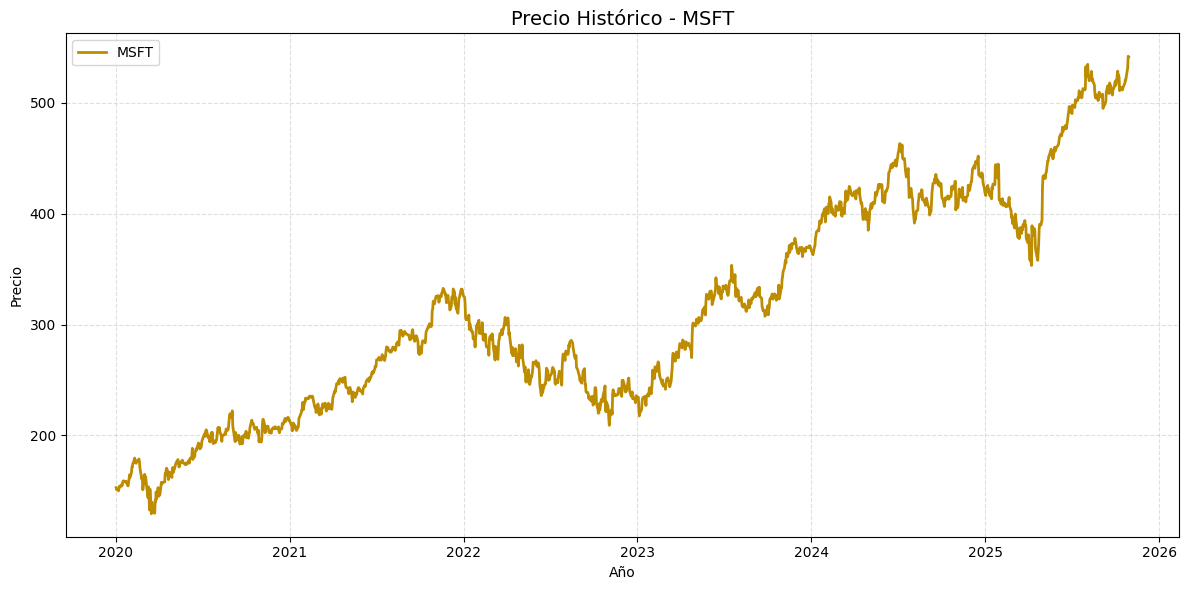

In [8]:
graficar_empresa("MSFT")

# Grafico comparativo

In [9]:
import matplotlib.pyplot as plt

def graficar_comparativo(lista_empresas, df):

    plt.figure(figsize=(12,6))
    empresas_validas = False
    
    for empresa in lista_empresas:
        empresa_df = df[df["Ticker"] == empresa]

        if empresa_df.empty:
            print(f"⚠️ No se encontraron datos para la empresa: {empresa}")
            continue
        
        empresas_validas = True
        
        # Obtener color asignado o uno por defecto si no está en el diccionario
        color = colores_empresas.get(empresa, None)

        plt.plot(empresa_df["Date"], empresa_df["Close"], 
                 label=empresa, linewidth=2, color=color)

    if not empresas_validas:
        print("No se pudo graficar porque ninguna empresa tenía datos.")
        return

    plt.title("Comparación del Precio de Cierre entre Empresas")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Empresas")
    plt.tight_layout()
    plt.show()


⚠️ No se encontraron datos para la empresa: UBER


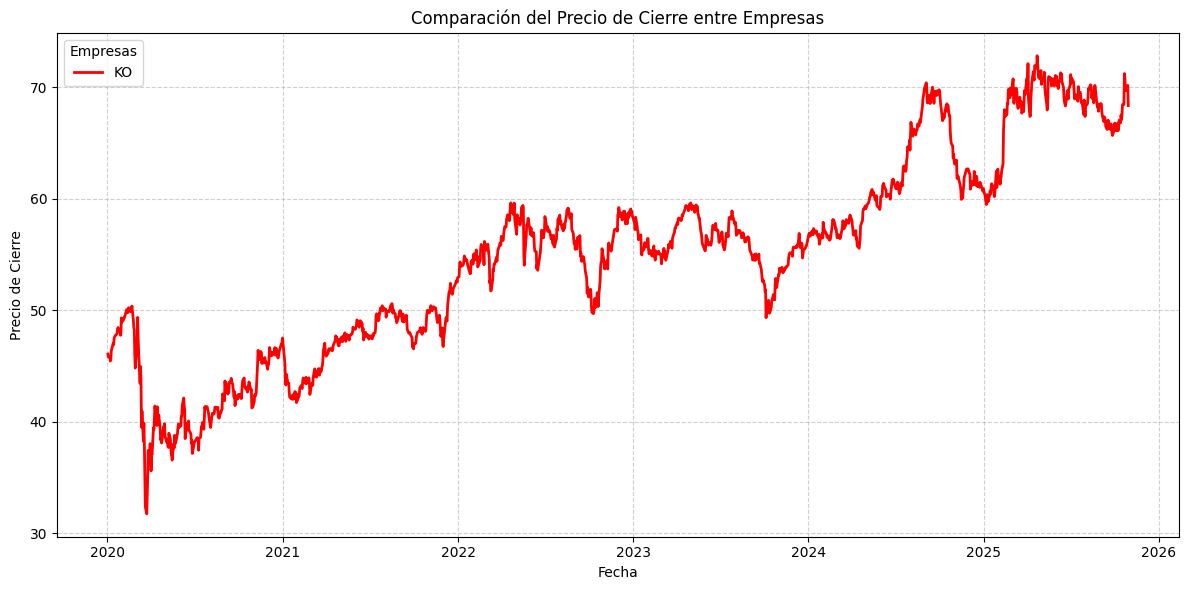

In [10]:
empresas = ["KO","UBER"]
graficar_comparativo(empresas, df)

# Tabla de Precios diarios 

In [11]:
import pandas as pd
df = pd.read_csv("Datos.csv") 
df["Date"] = pd.to_datetime(df["Date"])

In [12]:
empresa = "AAPL" #se puede cambiar la empresa
#"AMZN","KO","UBER","PEP","TSLA","AAPL","MSFT","NVDA","NFLX","DIS","NKE","F","WMT","PFE","META","GOOG","MA","V" 
fecha_inicio = "2021-01-01"
fecha_fin = "2023-01-01"
#rango de fechas (2021-01-01 a 2023-01-01)

In [13]:
tabla_precios_diarios  = df[
    (df["Ticker"] == empresa) & 
    (df["Date"] >= fecha_inicio) & 
    (df["Date"] <= fecha_fin)
]
tabla_precios_diarios = tabla_precios_diarios.round(2)

tabla_precios_diarios.tail()
tabla_precios_diarios.head()

tabla_precios_diarios

,Date,Open,High,Low,Close,Volume,Ticker
253,2021-01-04,129.98,130.06,123.39,125.97,143301900,AAPL
254,2021-01-05,125.47,128.24,125.02,127.53,97664900,AAPL
255,2021-01-06,124.33,127.57,123.02,123.24,155088000,AAPL
256,2021-01-07,124.95,128.14,124.47,127.44,109578200,AAPL
257,2021-01-08,128.91,129.11,126.77,128.54,105158200,AAPL
...,...,...,...,...,...,...,...
751,2022-12-23,128.97,130.45,127.71,129.90,63814900,AAPL
752,2022-12-27,129.43,129.46,126.81,128.10,69007800,AAPL
753,2022-12-28,127.74,129.08,124.00,124.17,85438400,AAPL
754,2022-12-29,126.09,128.54,125.83,127.68,75703700,AAPL
